# Mars Images

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import math

## Load Data

In [2]:
labels = pd.read_fwf('msl_synset_words-indexed.txt', sep=' ', header=None)
labels.rename(columns={0:'Label', 1:'Description'}, inplace=True)

In [3]:
train_shuffled = pd.read_fwf('train-calibrated-shuffled.txt', sep=' ', header=None)
train_shuffled.rename(columns={0:'Filename', 1:'Label'}, inplace=True)
train_shuffled['Filename'] = train_shuffled['Filename'].str[11:]

In [4]:
val_shuffled = pd.read_fwf('val-calibrated-shuffled.txt', sep=' ', header=None)
val_shuffled.rename(columns={0:'Filename', 1:'Label'}, inplace=True)
val_shuffled['Filename'] = val_shuffled['Filename'].str[11:]

In [5]:
test_shuffled = pd.read_fwf('test-calibrated-shuffled.txt', sep=' ', header=None)
test_shuffled.rename(columns={0:'Filename', 1:'Label'}, inplace=True)
test_shuffled['Filename'] = test_shuffled['Filename'].str[11:]

In [6]:
filenames = pd.DataFrame(os.listdir('calibrated'))
filenames.rename(columns={0:'Filename'}, inplace=True)

In [7]:
concat = pd.concat([train_shuffled, val_shuffled, test_shuffled]).reset_index(drop=True)

In [8]:
filenames = filenames.merge(concat, how='left', on='Filename')

,Filename,Label
0,0150MR0008430140201229D01_DRCL.JPG,14.0
1,0096MH0001280000101133I01_DRCL.JPG,10.0
2,0177MH0002260000102374E01_DRCL.JPG,20.0
3,0322MH0003010000103935C00_DRCL.JPG,12.0
4,0081MR0004400010104055I01_DRCL.JPG,17.0
...,...,...
6732,0758MR0032610000403794E01_DRCL.JPG,7.0
6733,0584MH0003620020202312I01_DRCL.JPG,8.0
6734,0019MR0000590010100155C00_DRCL.JPG,8.0
6735,0077MR0005750010103776E01_DRCL.JPG,8.0


In [14]:
dropped = filenames.dropna()
unlabled = filenames[~filenames.index.isin(dropped.index)]

In [15]:
folder_path = "calibrated"

labled_files = concat['Filename'].tolist()
unlabled_files = unlabled['Filename'].tolist()

images = [Image.open(os.path.join(folder_path, file)) for file in labled_files]
images_unlabled = [Image.open(os.path.join(folder_path, file)) for file in unlabled_files]

In [ ]:
folder_path = "calibrated"

# Get a list of all files in the folder
file_list = concat['Filename'].tolist()

# Filter the list to keep only files with certain extensions (e.g., .jpg, .png)
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.png'))]

# Load images into Python
images = [Image.open(os.path.join(folder_path, file)) for file in image_files]

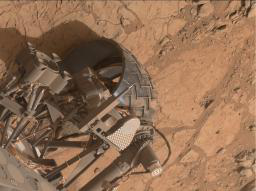

In [18]:
images_unlabled[12]

## Assign Labels to Images

In [ ]:
concat.shape

In [13]:
unlabled.shape

(46, 2)

In [ ]:
concat['Label'].value_counts()

In [11]:
filenames.isna().sum()

Filename     0
Label       46
dtype: int64

In [ ]:
len(images)

In [ ]:
max(filenames['Label'])

In [ ]:
filenames['Label'].value_counts()

## Exploration

In [ ]:
# Assuming 'images' is the list of PIL Image objects
num_images_to_display = 12

# Calculate the number of rows and columns for the subplot grid
num_rows = math.ceil(num_images_to_display / 4)
num_cols = min(num_images_to_display, 4)

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

# Flatten the axes array if it's more than 1D
axes = axes.flatten()

# Display the first few images in the subplots
for i in range(num_images_to_display):
    #j = i*200
    if i < len(images):
        axes[i].imshow(images[i])
        axes[i].set_title(f"Image {i + 1}")

# Remove any empty subplots
for i in range(num_images_to_display, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()